In this lecture we're going to start with a pretty gentle introduction to matplot lib and how you might
start looking at data visually. Now, many of the other lectures will use other toolkits and be more of demos
than walkthroughts, but here I want to try and point out some of the fundamentals underneath matplotlib and
how they are actualized.

In [1]:
# The first thing we're going to do is to setup the matplotlib back end using a magic function. To see a list
# of the backends available on this system we can just call
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [2]:
# There are quite a few! Many of these will do nothing in a notebook - for instance, the gtk backend is going
# to try and render our plots to a desktop application, not super helpful here. There are really two common
# ways to use matplotlib in jupyter notebooks, the first being with an inline backend, which will store the
# plots in the notebook data itself, and the second is with the notebook backend, which adds some basic
# interaction like zooming. Let's configure this notebook to show plots inline
%matplotlib inline

In [3]:
# Ok, let's bring in this scripting layer we were talking about, called pyplot
import matplotlib.pyplot as plt

In [4]:
# One more important bit, and this deals with the Jupyter notebooks specifically. The Jupyter notebook
# environment controls a number of different interaction mechanisms, and sometimes this seems a little bit
# like magic. For instance, you should have already seen that when you type a variable name, say df for a
# DataFrame, Jupyter will try and render that to the screen in a meaningful way. The Jupyter notebooks by
# default change how matplotlib figures are render, and close figures at the end of cell execution. I find
# this default a particularly questionable choice, and I'm going to turn it off here so we can delve a bit
# deeper into matplotlib
from IPython.display import set_matplotlib_close
set_matplotlib_close(False)

In [5]:
# Ok, now that we've disabled some magic, let's dive into matplotlib through the pyplot scripting interface.
# We can start with the very basics, creating a new figure
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
# That doesn't look like it has done anything, but it's actually initialized the scripting layer with a new
# figure where we can plot things. We can get a reference to this figure at any time by calling the get
# current figure, or gcf() function
fig=plt.gcf()
fig

<Figure size 432x288 with 0 Axes>

In [7]:
# When a figure is created in matplotlib it is also given an identifier. We can ask the pyplot scripting layer
# to tell us about all of the figures which currently exist by looking at the figure numbers
plt.get_fignums()

[1]

In [8]:
# A figure contains an Axes object. We can get that object directly from the figure if we want to using the
# figure's get_axes() function
fig.get_axes()

[]

In [9]:
# But actually, this isn't very common when using pyplot, because we think more in a scripting method, which
# is more imperitive in nature (that is, we're issueing commands to the system), than object oriented in
# nature. With matplotlib you can get both, and this is both powerful and can be confusing. So we can use
# the plt.gca() function to get the current axes
plt.gca()

<AxesSubplot:>

In [10]:
# This seems all a bit pedantic though - we're talking about figures and axes but we can't see anything! Let's
# plot some data. If we call the pyplot plot() function we can send in a couple of lists of points to plot.
# underneath the function is actually going to get the current figure and current axes object for us, and
# plot the points on that
plt.plot([1,2,3],[4,6,10])

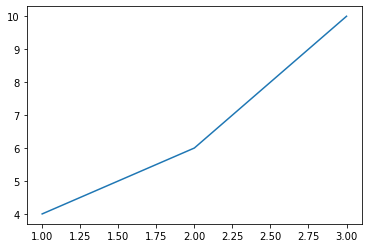

In [11]:
# Ok, so this is where things might be a bit confusing. We just see this lines list with one line in it coming
# back. We have to tell pyplot that we actually want to render the image now to our backend. We do this with
# .show()
plt.show()

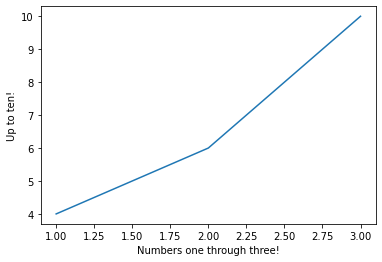

In [12]:
# Awesome! Our first figure. We can see tat the lists of numbers we passed are the x and y parameters
# respectively for three points, and for some reason matplotlib decided to connect these points in lines.
# It's also worth noticing that there is some work matplotlib did for us, including drawing axis objects and
# setting the scale for our plot.

# Let's demystify this a bit. Remember that there are two axis objects for one axes object, the x axis and the
# y axis. We can get these objects directly if we want to
x=plt.gca().get_xaxis()
y=plt.gca().get_yaxis()

# Once we have the Axis object we can inspect them and change them. Let's update some labels in the figure
x.set_label_text("Numbers one through three!")
y.set_label_text("Up to ten!")

# And let's make sure to rerender our image
plt.show()

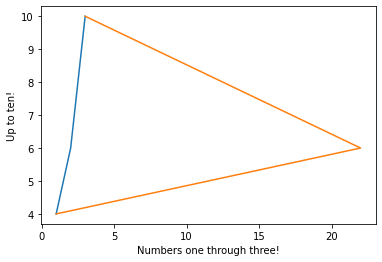

In [13]:
# Ok, great. If we want to plot more data onto this same plot we can just call the pyplot plot() function
# again. Underneath this is looking up the current active axes and dropping the data on there
plt.plot([1,22,3],[4,6,10])
plt.show()

In [ ]:
# You'll notice that when we did this matplotlib dealt with all of the axis scaling for us, and put the new
# data series directly on in a new color. Any time we want to start up a new figure, we just call plt.figure()

In [ ]:
# As we discussed, matplotlib orients a number of different renderable objects called Artists in the artists
# layer and that can be passed to the back end for rendering. You actually can control most of these, but the
# scripting interface that we're working in, pyplot, is hiding a lot of this functionality. Let's take a look
# at that object inheritence diagram again

In [14]:
%%html
<img src='https://matplotlib.org/3.1.1/_images/inheritance-b12a398b08039fbb54e0dbb3eb616f39e9d9c069.png' />

In [15]:
# That diagram shows almost everything inherits from the Artist class. And the Artist class has a nice
# function called get_children, which contains a list of all of the children of this artist. Let's see what
# children it has
plt.gca().get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [ ]:
# Ok, here's the guts of our plot! The axes object actually contains a whole bunch of children which are
# Artists themselves. Splines, XAxis, Text, etc. All of these things have properties which we can change and
# play with. Now, you won't normally go this deep into the matplotlib architecture, but I want you to be aware
# of what's in here -- you can read the matplotlib docs to understand more about any of these objects and
# their properties. We'll discover some together over rest of this course, but you're really going to have to
# use secondary resources such as textbooks, websites, and most importantly, the online library docs for
# matplotlib in order to create truly compelling graphics.